# Imports and data loading

In [1]:
import gtfparse
import os
from tqdm import tqdm
import re
import numpy as np
import pandas as pd

import seaborn as sns
import glob
%load_ext autoreload
%autoreload 2

In [2]:
outdir = '/Users/olgabot/botryllus/adhoc-analysis/2022-apr--gather-botryllus-in-human-mouse-with-kmers/'
# ! mkdir $outdir

## Get chr6 of human

In [3]:
human_gencode_dir = '/Users/olgabot/botryllus-data/data/gencode/v38'
human_gff = os.path.join(human_gencode_dir, 'gencode.v38.basic.annotation.gff3')
human_gff_chr6 = human_gff.replace('.gff3', 'chr6.gff3')
! rg '^chr6' $human_gff > $human_gff_chr6

In [4]:
human_gtf = human_gff.replace('.gff3', 'gtf')
! gffread $human_gff -T -o $human_gtf

## Read botryllus putative MHC Matches

In [5]:
%%time

mhc_parquet =  os.path.join(outdir, "botryllus_gather_mouse_human_results_with_e_values_mhc_chromosomes.parquet")


gather_results_mhc = pd.read_parquet(mhc_parquet
)
print(gather_results_mhc.shape)
gather_results_mhc.head()

(17150858, 25)
CPU times: user 32.3 s, sys: 37.6 s, total: 1min 9s
Wall time: 1min 3s


,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,...,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
0,623,DVNLRDQQGKSPIFYAEEQNNLDV,phphpppphpphhhhhppppphph,9053272763448756255,g22187.t1 frame:1,30,RGHLCRTRPTDLVFVVDSSRSVRP,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
1,624,VNLRDQQGKSPIFYAEEQNNLDVM,hphpppphpphhhhhppppphphh,1654375679729437405,g22187.t1 frame:1,31,GHLCRTRPTDLVFVVDSSRSVRPV,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
2,625,NLRDQQGKSPIFYAEEQNNLDVMK,phpppphpphhhhhppppphphhp,2361844746549016494,g22187.t1 frame:1,32,HLCRTRPTDLVFVVDSSRSVRPVE,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
3,626,LRDQQGKSPIFYAEEQNNLDVMKY,hpppphpphhhhhppppphphhph,8601332297558688433,g22187.t1 frame:1,33,LCRTRPTDLVFVVDSSRSVRPVEF,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
4,308,GKEKGTKKSPEIADDVSDNDKADA,hppphpppphphhpphppppphph,4814295539498208365,g22187.t1 frame:1,265,INKRLSKSSATLWNSPSRNRSLQL,ENST00000474796.2 gene_id=ENSG00000116871.16;t...,7,35,...,Chr1:36155965-36180849(+),True,ENST00000474796.2,202,196,2.0,0.628367,2.577309e-07,39190.054231,4.593176


## Write botryllus query names to file

In [6]:
botryllus_putative_mhc_matches = gather_results_mhc[['name_query', 'homolog_group']].drop_duplicates()
print(botryllus_putative_mhc_matches.shape)
botryllus_putative_mhc_matches.head()

(197698, 2)


,name_query,homolog_group
0,g22187.t1 frame:1,MATN1---Matn1
4,g22187.t1 frame:1,MAP7D1---Map7d1
25,g22187.t1 frame:1,SLC6A9---Slc6a9
28,g22187.t1 frame:1,GRB14---Grb14
32,g22187.t1 frame:1,PMS1---Pms1


In [7]:
botryllus_putative_mhc_matches.homolog_group.value_counts()

TTN---Ttn            473
TCHH---Tchh          341
DST---Dst            301
SRRM2---Srrm2        271
SYNE1---Syne1        243
                    ... 
DEPDC1B---Depdc1b      1
MINDY3---Mindy3        1
TOMM6---Tomm6          1
KCNJ2---Kcnj2          1
COMMD7---Commd7        1
Name: homolog_group, Length: 18237, dtype: int64

In [8]:
csv = os.path.join(outdir, 'botryllus_putative_mhc_matches.txt')
botryllus_putative_mhc_matches.to_csv(csv, index=False)

## Subset to only human matches

In [9]:
gather_results_mhc_human = gather_results_mhc.query('species == "human"')
gather_results_mhc_human.head()

,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,...,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
0,623,DVNLRDQQGKSPIFYAEEQNNLDV,phphpppphpphhhhhppppphph,9053272763448756255,g22187.t1 frame:1,30,RGHLCRTRPTDLVFVVDSSRSVRP,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
1,624,VNLRDQQGKSPIFYAEEQNNLDVM,hphpppphpphhhhhppppphphh,1654375679729437405,g22187.t1 frame:1,31,GHLCRTRPTDLVFVVDSSRSVRPV,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
2,625,NLRDQQGKSPIFYAEEQNNLDVMK,phpppphpphhhhhppppphphhp,2361844746549016494,g22187.t1 frame:1,32,HLCRTRPTDLVFVVDSSRSVRPVE,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
3,626,LRDQQGKSPIFYAEEQNNLDVMKY,hpppphpphhhhhppppphphhph,8601332297558688433,g22187.t1 frame:1,33,LCRTRPTDLVFVVDSSRSVRPVEF,ENST00000373765.5 gene_id=ENSG00000162510.6;tr...,4,20,...,Chr1:30711277-30723585(-),True,ENST00000373765.5,202,85,2.0,0.623465,1.370379e-06,16770.715881,4.224552
4,308,GKEKGTKKSPEIADDVSDNDKADA,hppphpppphphhpphppppphph,4814295539498208365,g22187.t1 frame:1,265,INKRLSKSSATLWNSPSRNRSLQL,ENST00000474796.2 gene_id=ENSG00000116871.16;t...,7,35,...,Chr1:36155965-36180849(+),True,ENST00000474796.2,202,196,2.0,0.628367,2.577309e-07,39190.054231,4.593176


In [10]:
botryllus_unlabeled_genes = gather_results_mhc["name_query"].loc[
    gather_results_mhc["name_query"].str.startswith("g")
]
botryllus_unlabeled_genes

0     g22187.t1 frame:1
1     g22187.t1 frame:1
2     g22187.t1 frame:1
3     g22187.t1 frame:1
4     g22187.t1 frame:1
            ...        
29    g28426.t1 frame:1
30    g28426.t1 frame:1
31    g28426.t1 frame:1
32    g28426.t1 frame:1
33    g28426.t1 frame:1
Name: name_query, Length: 17146454, dtype: object

In [11]:

# botryllus_unlabeled_genes_sorted = sorted(list(set(botryllus_unlabeled_genes)), key=lambda x: int(x.split('g')[1].split('.')[0]))
# botryllus_unlabeled_genes_sorted[-2:]

In [12]:
gather_results_mhc['name_query'].max()

'mFuHC'

## Read human GTF file

### Convert gff to gtf

In [13]:
human_gtf_chr6 = human_gff_chr6.replace('.gff3', '.gtf')

In [14]:
! gffread $human_gff_chr6 -T -o $human_gtf_chr6

In [15]:
human_genes = gtfparse.read_gtf(human_gtf)

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id', 'gene_name']


In [16]:
human_transcripts = human_genes.query('feature == "transcript"')
print(human_transcripts.shape)
human_transcripts.head()

(111832, 11)


,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id,gene_name
0,chr1,HAVANA,transcript,11869,14409,NaN,+,0,ENST00000456328.2,ENSG00000223972.5,DDX11L1
4,chr1,HAVANA,transcript,12010,13670,NaN,+,0,ENST00000450305.2,ENSG00000223972.5,DDX11L1
11,chr1,HAVANA,transcript,14404,29570,NaN,-,0,ENST00000488147.1,ENSG00000227232.5,WASH7P
23,chr1,ENSEMBL,transcript,17369,17436,NaN,-,0,ENST00000619216.1,ENSG00000278267.1,MIR6859-1
25,chr1,HAVANA,transcript,29554,31097,NaN,+,0,ENST00000473358.1,ENSG00000243485.5,MIR1302-2HG


Delete human genes parsed GTF because it's so big

In [17]:
del human_genes

In [18]:
human_transcripts['transcript_id_no_version'] = human_transcripts.transcript_id.str.split('.').str[0]
human_transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id,gene_name,transcript_id_no_version
0,chr1,HAVANA,transcript,11869,14409,NaN,+,0,ENST00000456328.2,ENSG00000223972.5,DDX11L1,ENST00000456328
4,chr1,HAVANA,transcript,12010,13670,NaN,+,0,ENST00000450305.2,ENSG00000223972.5,DDX11L1,ENST00000450305
11,chr1,HAVANA,transcript,14404,29570,NaN,-,0,ENST00000488147.1,ENSG00000227232.5,WASH7P,ENST00000488147
23,chr1,ENSEMBL,transcript,17369,17436,NaN,-,0,ENST00000619216.1,ENSG00000278267.1,MIR6859-1,ENST00000619216
25,chr1,HAVANA,transcript,29554,31097,NaN,+,0,ENST00000473358.1,ENSG00000243485.5,MIR1302-2HG,ENST00000473358


In [19]:
def mean_coord(x):
    return pd.Series((x.seqname, (x.end + x.start) / 2), index=["seqname", "coord"])

human_txpt_coords = human_transcripts.apply(mean_coord, axis=1)
human_txpt_coords.index = human_transcripts['transcript_id']
human_txpt_coords.head()

,seqname,coord
transcript_id,,
ENST00000456328.2,chr1,13139.0
ENST00000450305.2,chr1,12840.0
ENST00000488147.1,chr1,21987.0
ENST00000619216.1,chr1,17402.5
ENST00000473358.1,chr1,30325.5


In [20]:
human_txpt_coords.shape

(111832, 2)

## Read botryllus GTF file

In [21]:
botryllus_gtf = '/Users/olgabot/botryllus/data/botryllus-proteins/transcripts30.gtf'
! head $botryllus_gtf

chr1	AUGUSTUS	CDS	10663	11169	.	+	0	transcript_id "g69880.t1"; gene_id "g69880"; geneID "g69880";
chr1	AUGUSTUS	CDS	12414	12547	.	-	2	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	14191	15628	.	-	0	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	15969	16064	.	-	0	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	16338	16521	.	-	1	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	16584	16724	.	-	1	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	17633	17829	.	-	0	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	18441	18546	.	-	1	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	18610	18731	.	-	0	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";
chr1	AUGUSTUS	CDS	18812	19093	.	-	0	transcript_id "g69881.t1"; gene_id "g69881"; geneID "g69881";


In [22]:
! grep BHF $botryllus_gtf

In [23]:
botryllus_genes = gtfparse.read_gtf(botryllus_gtf)
botryllus_genes.head()

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id', 'geneID']


,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id,geneID
0,chr1,AUGUSTUS,CDS,10663,11169,NaN,+,0,g69880.t1,g69880,g69880
1,chr1,AUGUSTUS,CDS,12414,12547,NaN,-,2,g69881.t1,g69881,g69881
2,chr1,AUGUSTUS,CDS,14191,15628,NaN,-,0,g69881.t1,g69881,g69881
3,chr1,AUGUSTUS,CDS,15969,16064,NaN,-,0,g69881.t1,g69881,g69881
4,chr1,AUGUSTUS,CDS,16338,16521,NaN,-,1,g69881.t1,g69881,g69881


In [24]:
# %%time

# botryllus_genes_fillna["transcript_id_with_gene"] = (
#     botryllus_genes_fillna["gene_name"]
#     + "."
#     + botryllus_genes_fillna["transcript_id"].str.split("-").str[-1]
# )
# botryllus_genes_fillna.head()

### Get middle position of each transcript

In [25]:
botryllus_transcripts = botryllus_genes.drop_duplicates("transcript_id")
botryllus_transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id,geneID
0,chr1,AUGUSTUS,CDS,10663,11169,NaN,+,0,g69880.t1,g69880,g69880
1,chr1,AUGUSTUS,CDS,12414,12547,NaN,-,2,g69881.t1,g69881,g69881
10,chr1,AUGUSTUS,CDS,19666,19731,NaN,+,0,g69882.t1,g69882,g69882
13,chr1,AUGUSTUS,CDS,31645,36942,NaN,-,0,g69958.t1,g69958,g69958
14,chr1,AUGUSTUS,CDS,37320,38720,NaN,-,0,g69959.t1,g69959,g69959


In [26]:
botryllus_transcripts.tail()

,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id,geneID
136053,chrUn,AUGUSTUS,CDS,406709447,406709659,NaN,+,0,g72099.t1,g72099,g72099
136054,chrUn,AUGUSTUS,CDS,406741121,406741290,NaN,-,2,g72100.t1,g72100,g72100
136056,chrUn,AUGUSTUS,CDS,406748761,406748938,NaN,-,1,g72102.t1,g72102,g72102
136060,chrUn,AUGUSTUS,CDS,406754335,406754598,NaN,-,0,g72103.t1,g72103,g72103
136061,chrUn,AUGUSTUS,CDS,406771211,406771398,NaN,+,2,g72105.t1,g72105,g72105


In [27]:
%%time

botryllus_transcript_coords = botryllus_transcripts.apply(
    mean_coord,
    axis=1,
)
botryllus_transcript_coords.index = botryllus_transcripts["transcript_id"]
botryllus_transcript_coords

CPU times: user 10.2 s, sys: 119 ms, total: 10.3 s
Wall time: 10.4 s


,seqname,coord
transcript_id,,
g69880.t1,chr1,10916.0
g69881.t1,chr1,12480.5
g69882.t1,chr1,19698.5
g69958.t1,chr1,34293.5
g69959.t1,chr1,38020.0
...,...,...
g72099.t1,chrUn,406709553.0
g72100.t1,chrUn,406741205.5
g72102.t1,chrUn,406748849.5


In [28]:
# botryllus_transcript_ids = set(botryllus_genes_fillna['transcript_id_with_gene'])
# len(botryllus_transcript_ids)

NameError: name 'botryllus_genes_fillna' is not defined

## Make coordinate matches of all botryllus genes

### Split botryllus transcript ids so it doesn't say the "frame" part

In [29]:
gather_results_mhc_human['botryllus_txpt_id'] = gather_results_mhc_human['name_query'].str.split().str[0]

/var/folders/7z/r1593ybs1sj2ks5zzl9vy8840000gn/T/ipykernel_86999/4127938855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gather_results_mhc_human['botryllus_txpt_id'] = gather_results_mhc_human['name_query'].str.split().str[0]


In [30]:
%time grouped = gather_results_mhc_human.groupby(['botryllus_txpt_id', 'transcript_id'])

CPU times: user 276 µs, sys: 20 µs, total: 296 µs
Wall time: 301 µs


In [31]:
human_txpt_coords.loc['ENST00000216832.9']

seqname         chr14
coord      39179237.0
Name: ENST00000216832.9, dtype: object

In [ ]:
# lines = []


# def try_getting_coords(txpt_id, txpt_coords, species, verbose=False):
#     try:
#         coord = txpt_coords.loc[txpt_id]
#         coord.index = f"{species}_" + coord.index
#         return coord
#     except KeyError:
#         if verbose:
#             print(f"{txpt_id} not found in {species}")


# for i, ((botryllus_txpt, human_txpt), df) in enumerate(tqdm(grouped)):
#     if i > 100:
#         break

#     b_coord = try_getting_coords(
#         botryllus_txpt, botryllus_transcript_coords, "botryllus", verbose=False
#     )
#     h_coord = try_getting_coords(human_txpt, human_txpt_coords, "human", verbose=False)

#     if b_coord is None or h_coord is None:
#         continue

#     line = pd.concat([b_coord, h_coord])
#     line["human_transcript_id"] = human_txpt
#     line["botryllus_transcript_id"] = botryllus_txpt
#     lines.append(line)

# botryllus_human_coords = pd.concat(lines, axis=1).T
# print(botryllus_human_coords.shape)
# botryllus_human_coords.head()

## Use only unique human-botryllus pairs

In [32]:
botryllus_human_unique = gather_results_mhc_human[['botryllus_txpt_id', 'transcript_id']].drop_duplicates()
print(botryllus_human_unique.shape)
botryllus_human_unique.head()

(368389, 2)


,botryllus_txpt_id,transcript_id
0,g22187.t1,ENST00000373765.5
4,g22187.t1,ENST00000474796.2
11,g22187.t1,ENST00000373150.8
18,g22187.t1,ENST00000373151.6
25,g22187.t1,ENST00000372307.7


### Add `_human` and `_botryllus` to column names

In [33]:
botryllus_transcript_coords.columns = botryllus_transcript_coords.columns + '_botryllus'
human_txpt_coords.columns = human_txpt_coords.columns + '_human'

In [34]:
botryllus_human_unique_with_coords = botryllus_human_unique.join(
    botryllus_transcript_coords, on="botryllus_txpt_id", rsuffix="_botryllus"
).join(human_txpt_coords, on="transcript_id", rsuffix="_human")
print(botryllus_human_unique_with_coords.shape)
botryllus_human_unique_with_coords.head()

(368389, 6)


,botryllus_txpt_id,transcript_id,seqname_botryllus,coord_botryllus,seqname_human,coord_human
0,g22187.t1,ENST00000373765.5,chr12,15384478.0,chr1,30717431.0
4,g22187.t1,ENST00000474796.2,chr12,15384478.0,chr1,36168504.5
11,g22187.t1,ENST00000373150.8,chr12,15384478.0,chr1,36168523.5
18,g22187.t1,ENST00000373151.6,chr12,15384478.0,chr1,36168521.0
25,g22187.t1,ENST00000372307.7,chr12,15384478.0,chr1,44004028.0


## Write to parquet file!!

In [35]:
parquet = os.path.join(outdir, 'botrllus_human_transcript_coords_for_syntenty.parquet')
botryllus_human_unique_with_coords.to_parquet(parquet)

In [ ]:
print(botryllus_human_unique_with_coords.shape)


# Plot synteny!

## PLot distribution of genes on human coordinates

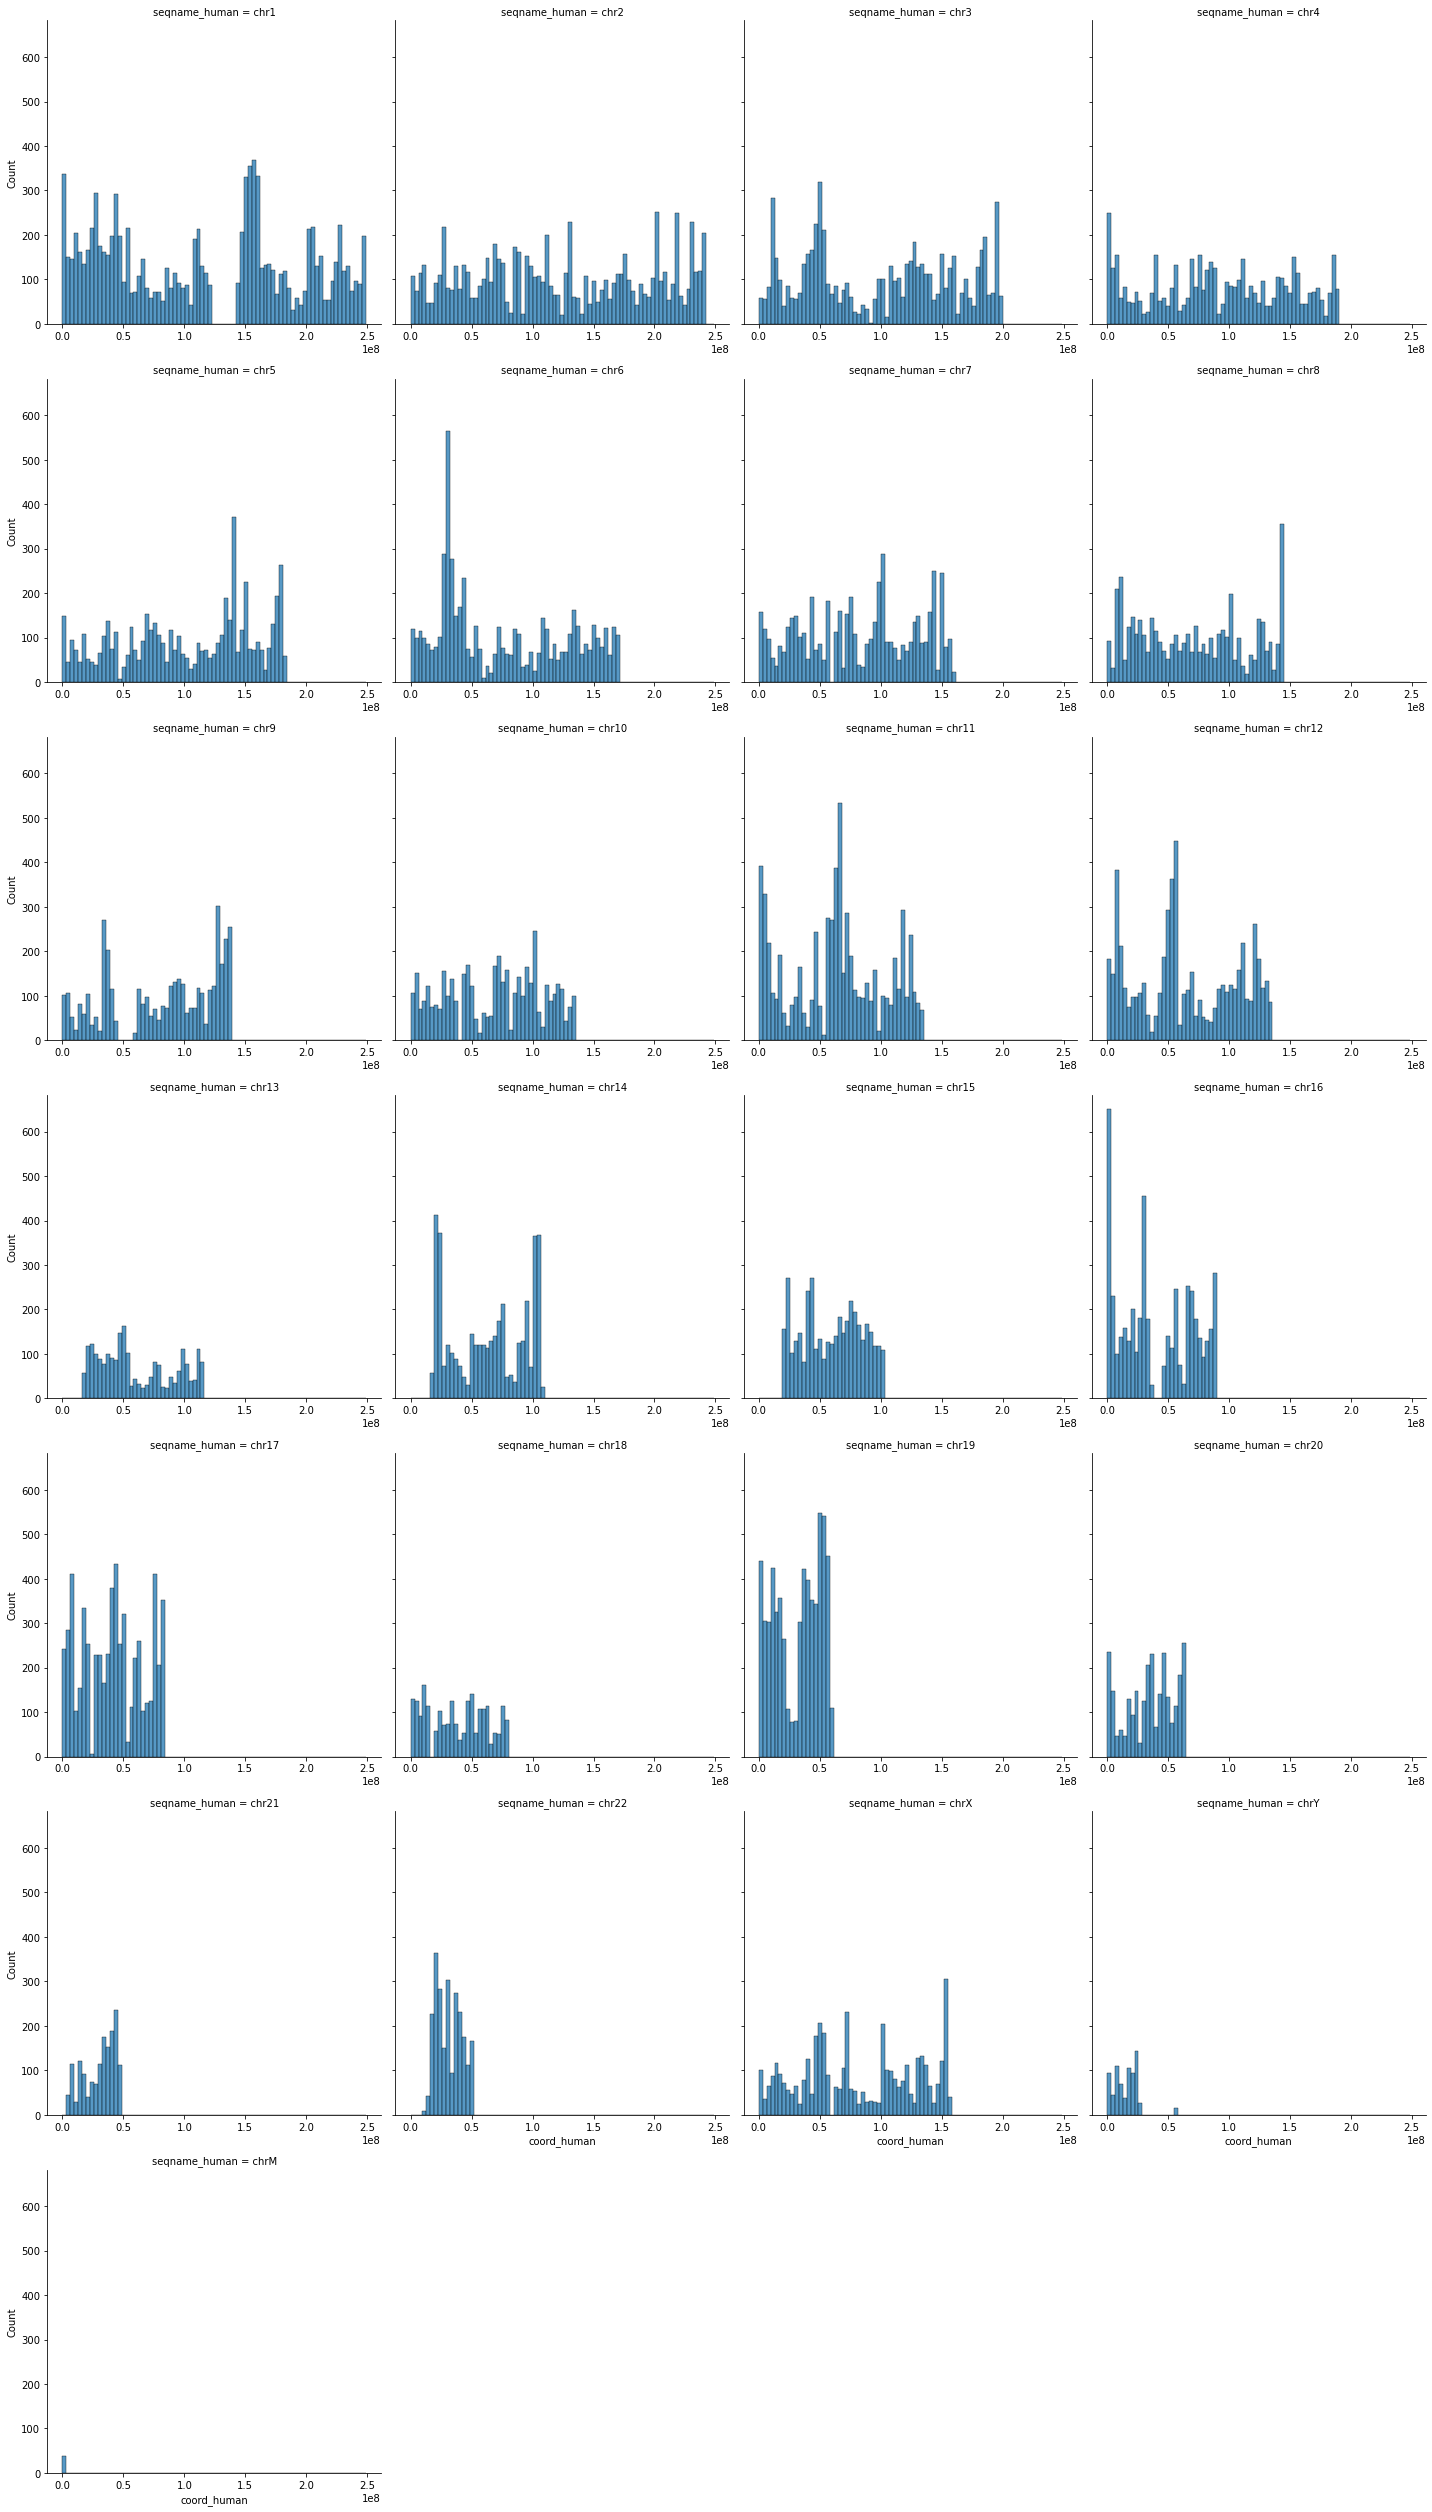

In [157]:
sns.displot(
    x="coord_human",
    data=human_txpt_coords,
    col="seqname_human",
    col_wrap=4,
    facet_kws=dict(sharex=False),
)

## Plot botryllus with chrom6 only

In [150]:
botryllus_human_unique_with_coords.head()

,botryllus_txpt_id,transcript_id,seqname_botryllus,coord_botryllus,seqname_human,coord_human
0,g22187.t1,ENST00000373765.5,chr12,15384478.0,chr1,30717431.0
4,g22187.t1,ENST00000474796.2,chr12,15384478.0,chr1,36168504.5
11,g22187.t1,ENST00000373150.8,chr12,15384478.0,chr1,36168523.5
18,g22187.t1,ENST00000373151.6,chr12,15384478.0,chr1,36168521.0
25,g22187.t1,ENST00000372307.7,chr12,15384478.0,chr1,44004028.0


In [151]:
botryllus_human_unique_with_coords_human_chr6 = (
    botryllus_human_unique_with_coords.query('seqname_human == "chr6"')
)
botryllus_human_unique_with_coords_human_chr6 = (
    botryllus_human_unique_with_coords_human_chr6.sort_values("seqname_botryllus")
)
botryllus_human_unique_with_coords_human_chr6.shape

(32069, 6)

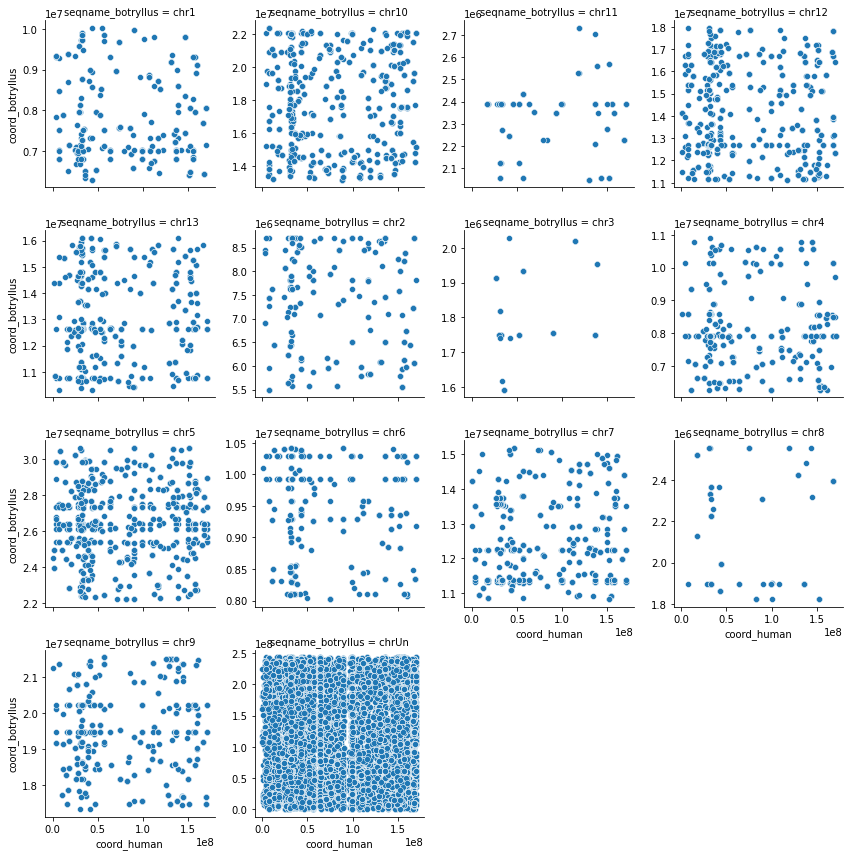

In [153]:
g = sns.FacetGrid(
    data=botryllus_human_unique_with_coords_human_chr6,
    # col="seqname_human",
    col="seqname_botryllus",
    col_wrap=4,
    sharey=False,
)
g.map(sns.scatterplot, "coord_human", "coord_botryllus")

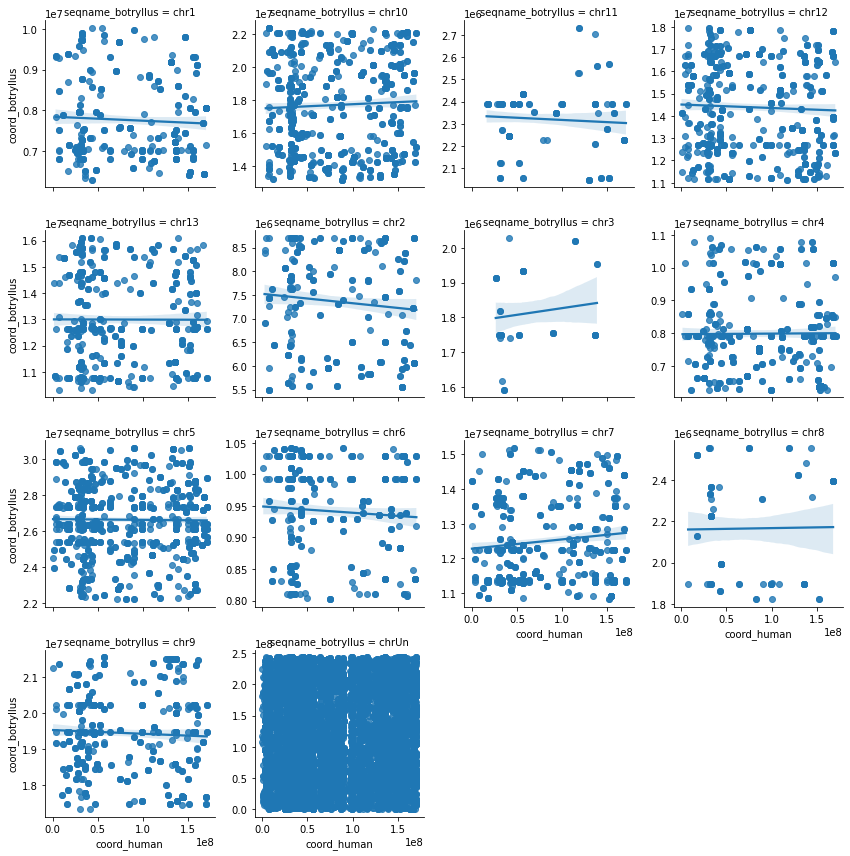

In [160]:
g = sns.FacetGrid(
    data=botryllus_human_unique_with_coords_human_chr6,
    # col="seqname_human",
    col="seqname_botryllus",
    col_wrap=4,
    sharey=False,
)
g.map(sns.regplot, "coord_human", "coord_botryllus")

In [162]:
botryllus_human_unique_with_coords_human_chr6.head()

,botryllus_txpt_id,transcript_id,seqname_botryllus,coord_botryllus,seqname_human,coord_human
193,g10570.t1,ENST00000452085.7,chr1,7309733.0,chr6,116362490.0
172,g10570.t1,ENST00000373127.8,chr1,7309733.0,chr6,41151839.5
177,g10570.t1,ENST00000426005.6,chr1,7309733.0,chr6,41151967.5
182,g10570.t1,ENST00000437044.2,chr1,7309733.0,chr6,41151968.0
187,g10570.t1,ENST00000398776.2,chr1,7309733.0,chr6,44171610.5


## Linearly Correlate coordinates

In [166]:
botryllus_human_unique_with_coords_human_chr6.groupby(
    ["seqname_botryllus", "seqname_human"]
).apply(lambda x: x.coord_botryllus.corr(x.coord_human))

seqname_botryllus  seqname_human
chr1               chr6            -0.050838
chr10              chr6             0.043697
chr11              chr6            -0.072592
chr12              chr6            -0.039093
chr13              chr6            -0.002546
chr2               chr6            -0.093055
chr3               chr6             0.136435
chr4               chr6             0.007667
chr5               chr6            -0.011435
chr6               chr6            -0.067223
chr7               chr6             0.110833
chr8               chr6             0.014053
chr9               chr6            -0.047348
chrUn              chr6             0.010032
dtype: float64

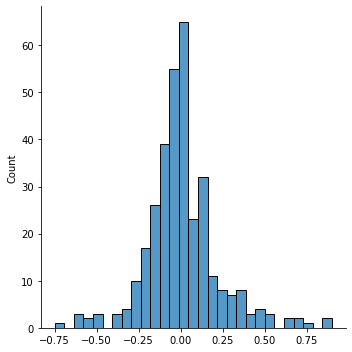

In [169]:
correlations = botryllus_human_unique_with_coords.groupby(
    ["seqname_botryllus", "seqname_human"]
).apply(lambda x: x.coord_botryllus.corr(x.coord_human))
sns.displot(correlations)

In [173]:
correlations[correlations.abs() > 0.25].sort_values()

seqname_botryllus  seqname_human
chr4               chrY            -0.749479
chr12              chrY            -0.599337
chr8               chr20           -0.591858
chr3               chr4            -0.590286
                   chr5            -0.564028
                   chr14           -0.548484
chr10              chrM            -0.500000
chr8               chr11           -0.494727
chr1               chrY            -0.469930
chr8               chr21           -0.386772
chr6               chr21           -0.368324
                   chr9            -0.366468
chr3               chrX            -0.335695
chr11              chr8            -0.329904
chr5               chr22           -0.326979
chr9               chr12           -0.308143
chr1               chr22           -0.269678
chr2               chr18           -0.268274
chr8               chr9            -0.267069
chr5               chrM            -0.262048
chr9               chr9            -0.261048
chr8               chr

## Plot coords

In [128]:
g = sns.FacetGrid(
    data=botryllus_human_unique_with_coords,
    col="seqname_human",
    row="seqname_botryllus",
)

g.map(sns.scatterplot, "coord_human", "coord_botryllus")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x19b2f5900> (for post_execute):


KeyboardInterrupt: 